The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[array([-5, -5]), array([-0.2, -3.4]), array([0.37909595, 0.82740042]), array([0.06847806, 1.49310163]), array([-0.2247955 ,  0.19774228]), array([-0.22384632,  0.01154354]), array([-0.41776436, -0.03111431]), array([-0.30065761,  0.03453367]), array([-0.4383724 ,  0.02446321]), array([-0.34074876,  0.08567228]), array([-0.45318434,  0.05216449]), array([-0.3729734 ,  0.09945017]), array([-0.46497657,  0.06563411]), array([-0.39832123,  0.10432995]), array([-0.47346895,  0.0749381 ]), array([-0.41825785,  0.10698106]), array([-0.47966808,  0.08222529]), array([-0.43411394,  0.10873517]), array([-0.48432885,  0.08810651]), array([-0.44683879,  0.10999228]), array([-0.48791627,  0.09289511]), array([-0.45711233,  0.11093141]), array([-0.49072387,  0.09680754]), array([-0.46543977,  0.11165118]), array([-0.492947  ,  0.10000905]), array([-0.4722079 ,  0.11221233]), array([-0.494722  ,  0.10263071]), ar

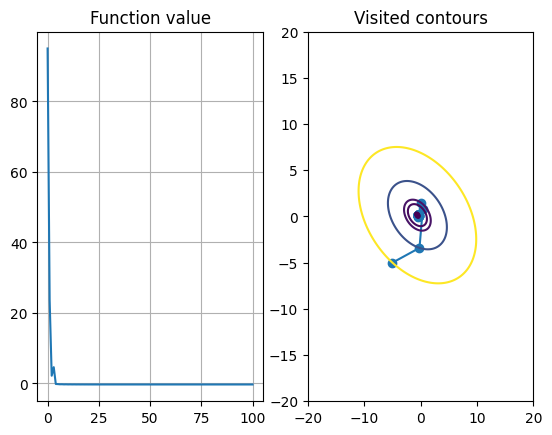

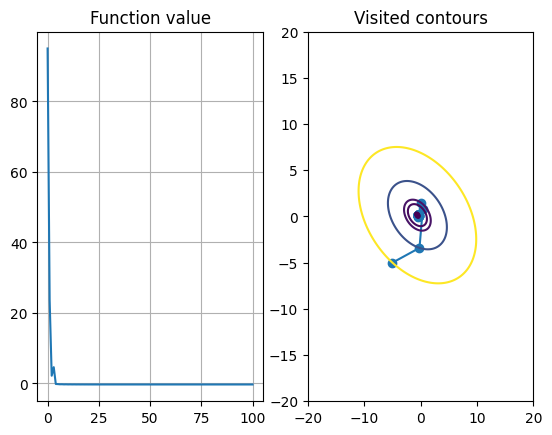

In [25]:
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *

roi = SearchRegion2d((-20, 20), (-20, 20))


def get_func(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return a * x ** 2 + b * y ** 2 + c * x * y + d * x + e * y

    return func


def get_derivative(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return np.array([2 * a * x + c * y + d, 2 * b * y + c * x + e])

    return func


f1 = get_func(1, 0, 1, 0, 0)
g1 = get_derivative(1, 0, 1, 0, 0)
f2 = get_func(0, 2, 0, 1, 0)
g2 = get_derivative(0, 2, 0, 1, 0)


def sum_funcs(f, g):
    return lambda x: f(x) + g(x)


#points = steepest_descent(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-2, 3]), bin_search, lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.3, 0.2), lambda f, steps: len(steps) > 100)
#points = steepest_descent_with_momentum(0.5)(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-5, -5]), bin_search, lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch_with_momentum(0.5, True)([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.4, 0.1), lambda f, steps: len(steps) > 100)
#points = steepest_descent_adagrad(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-2, 3]), fixed_step_search(1), lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch_adagrad([f1, f2], [g1, g2], 1, np.array([-1, 1]), exponential_learning_scheduler(1, 0), lambda f, steps: len(steps) > 100)
#points = steepest_descent_rms_prop(0.5)(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-5, -5]), bin_search, lambda f, steps: len(steps) > 50)
points = gradient_descent_minibatch_rms_prop(0.2)([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.4, 0.1), lambda f, steps: len(steps) > 100)

print(points)
visualize_optimizing_process(sum_funcs(f1, f2), roi, np.array(points))

